In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path
path = r'C:\Users\pinto\OneDrive\Documenti\1-2024-Instacart Basket Analysis'

In [3]:
# Import ords_prods_grouped.pkl
df_instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data.pkl'))

<Axes: xlabel='order_dow'>

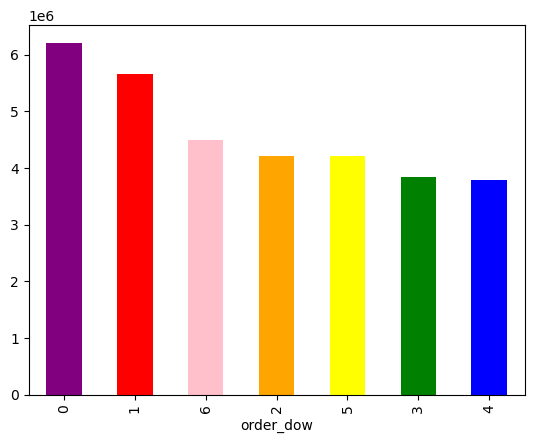

In [4]:
# Create a bar chart for orders day of the week
df_instacart['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

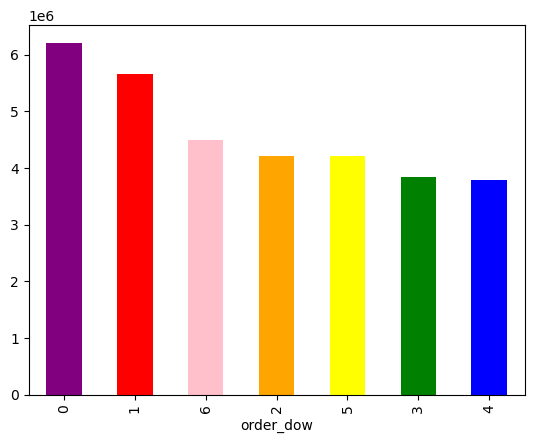

In [5]:
bar = df_instacart['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# Save figure in the visualization folder 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_2.png'))

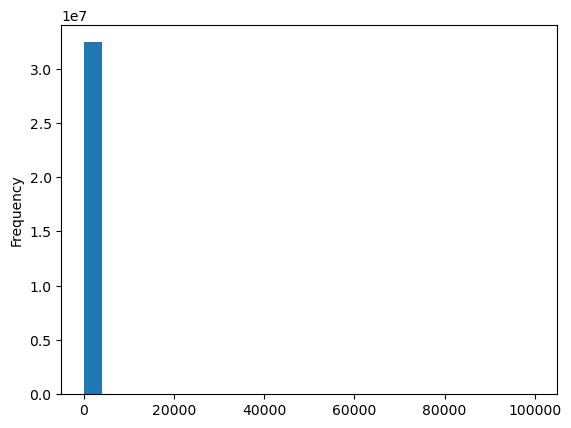

In [7]:
# Create histogram
hist = df_instacart['prices'].plot.hist(bins = 25)

In [8]:
# Check for error
df_instacart['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

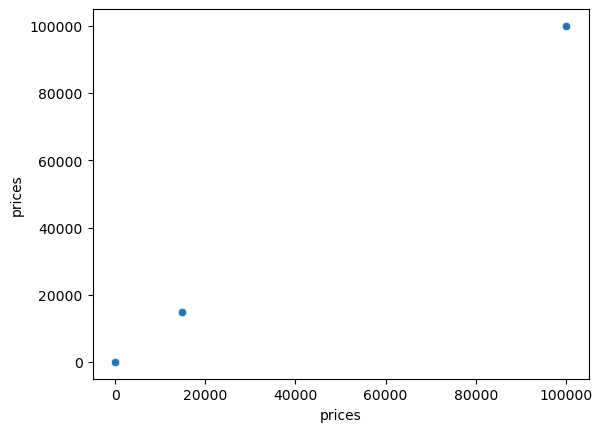

In [9]:
# Create scatterplot to further investigate data
sns.scatterplot(x = 'prices', y = 'prices',data = df_instacart)

In [10]:
# Check for values over the price of 100$
df_instacart.loc[df_instacart['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_ords_prods,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,family_status,income,exists
7816,24261,24261,1435153,1519,prior,26,2,11,6.0,21553,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7817,24267,24267,1066435,1519,prior,32,3,10,5.0,21553,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15172,39073,39073,1697208,2409,prior,33,1,19,5.0,21553,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20294,57126,57126,965345,3531,prior,27,2,19,8.0,33664,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20528,61481,61481,2943740,3793,prior,1,2,9,NaN,21553,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,854612,854612,3265389,51346,prior,4,1,17,13.0,33664,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32337105,2186800,2186800,1179092,131671,prior,12,4,9,15.0,33664,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32340034,658416,658416,1226705,39667,prior,7,2,15,20.0,33664,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32359285,1583942,1583942,3000037,95105,prior,2,4,19,22.0,33664,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [11]:
# Mark all values over 100$ as missing
df_instacart.loc[df_instacart['prices'] >100, 'prices'] = np.nan

In [12]:
# Check result
df_instacart['prices'].max()

25.0

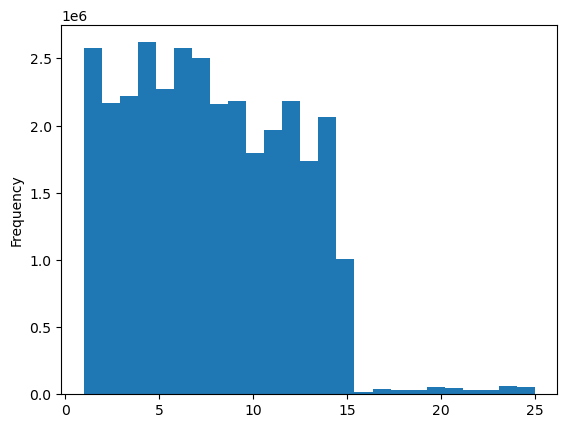

In [13]:
# Generate histogram again
hist = df_instacart['prices'].plot.hist(bins = 25)

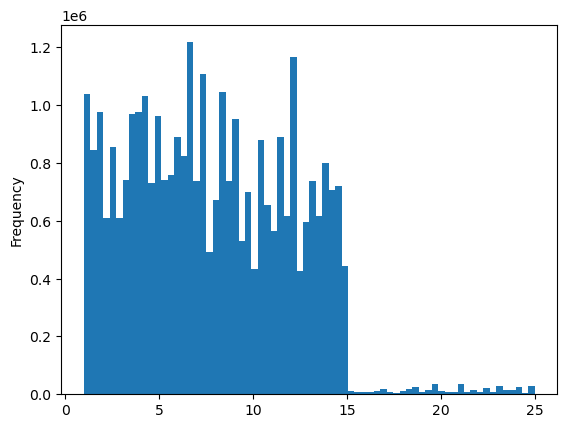

In [14]:
#Increase the level of granularity
hist2 = df_instacart['prices'].plot.hist(bins = 70)

In [15]:
# Save figure in the visualization folder 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices2.png'))

In [16]:
# Create dev list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.7

In [17]:
dev

array([False,  True, False, ..., False,  True,  True])

In [18]:
# Store 70% of the sample in the dataframe big
big = df_instacart[dev]

In [19]:
# Store 30% of the sample in the dataframe small
small = df_instacart[~dev]

In [20]:
# Check the result
len(df_instacart)

32434212

In [21]:
len(big) + len(small)

32434212

In [22]:
# Reduce the sample to only necessary columns
df_2 = small[['order_dow','prices']]

In [23]:
# Replace inf values with nan
df_2.replace(np.inf, np.nan)

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32434188,1,10.7
32434191,2,10.7
32434199,4,10.7
32434204,2,10.7


C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


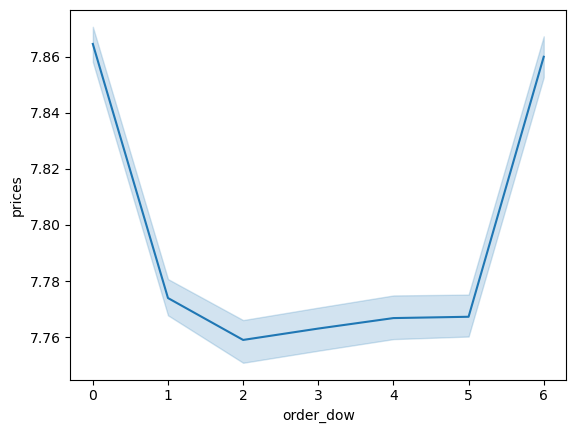

In [24]:
# Create chart
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

In [28]:
# Save figure in the visualization folder 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))

3.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

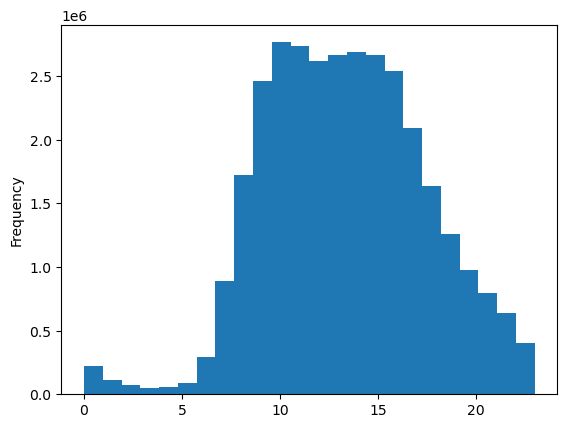

In [29]:
# Create histogram of the "order_hour_of_day" column
hist_hod = df_instacart['order_hour_of_day'].plot.hist(bins = 24)

In [30]:
# Save figure in the visualization folder 
hist_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hod.png'))

The histogram above confirms that the busiest hour of the day for orders is 10 AM, while the least busy is 3AM. 

4.
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

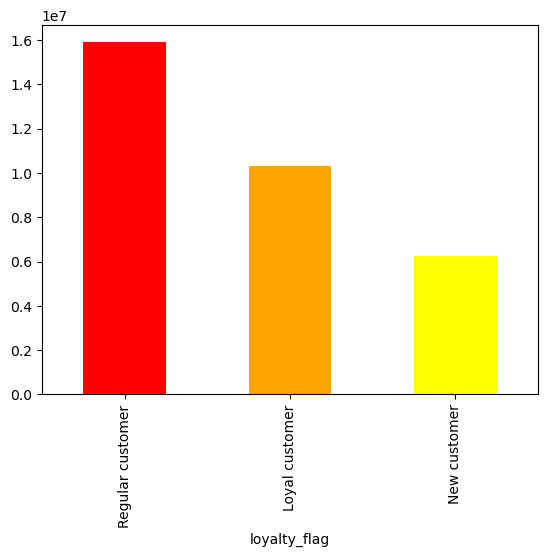

In [31]:
# Create a bar chart for "loyalty_flag" column
df_instacart['loyalty_flag'].value_counts().plot.bar(color =['red', 'orange', 'yellow'])

As discovered before, regular customers are more than loyal and new ones.

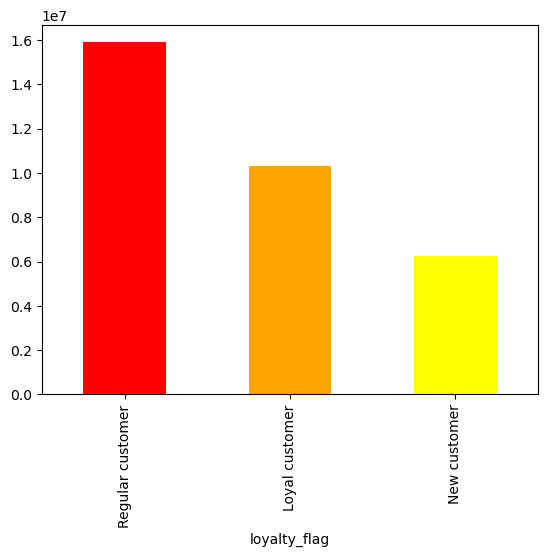

In [34]:
bar_loyalty = df_instacart['loyalty_flag'].value_counts().plot.bar(color =['red', 'orange', 'yellow'])

In [35]:
# Save figure in the visualization folder 
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

5.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [36]:
# Reduce the sample to only necessary columns
df_3 = small[['order_hour_of_day','prices']]

In [37]:
# Replace inf values with nan
df_3.replace(np.inf, np.nan)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32434188,0,10.7
32434191,11,10.7
32434199,17,10.7
32434204,22,10.7


C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


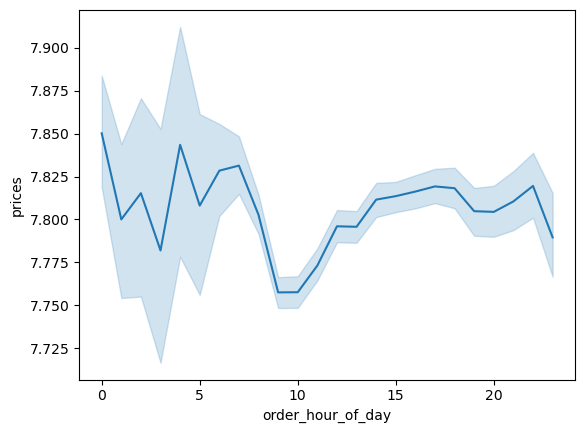

In [38]:
# Create chart
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

The line chart above shows that most expensive products are bought between 2 and 3 AM.

In [39]:
# Save figure in the visualization folder 
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hod.png'))

6.
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [40]:
# Reduce the sample to only necessary columns
df_4 = small[['Age','number_of_dependants']]

In [41]:
# Replace inf values with nan
df_4.replace(np.inf, np.nan)

,Age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32434188,25,0
32434191,25,0
32434199,25,0
32434204,25,0


C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pinto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


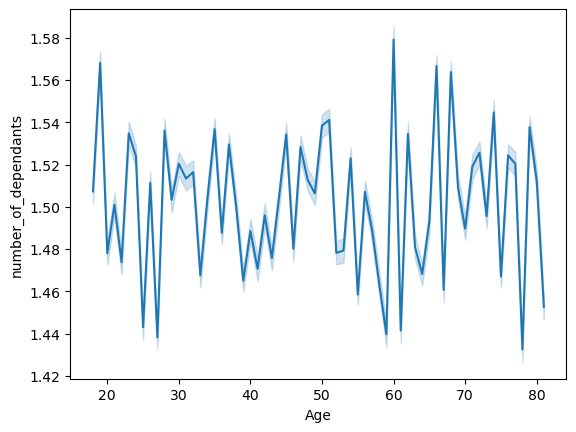

In [42]:
# Create chart
line3 = sns.lineplot(data = df_4, x = 'Age', y = 'number_of_dependants')

In [43]:
# Save figure in the visualization folder 
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_number.png'))

The line chart above shows that the number of dependants for customers varies widely across all age groups. The number of dependants ranges from 1.42 at age about 80 to 1.58 at age around 60 years.

7.
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<Axes: xlabel='Age', ylabel='income'>

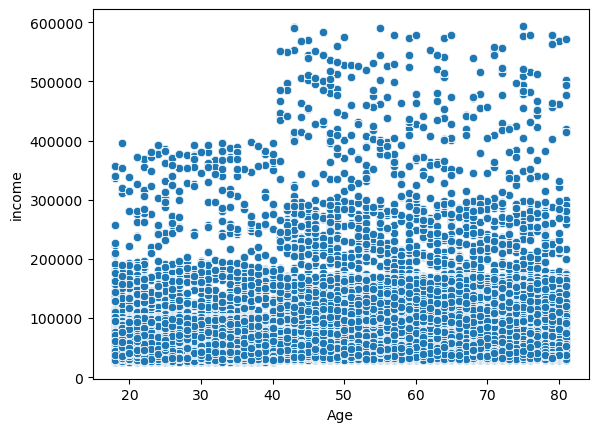

In [44]:
# Create scatterplot 
sns.scatterplot(x = 'Age', y = 'income',data = df_instacart)

In [50]:
# Save figure in the visualization folder 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot.png'))

<Figure size 640x480 with 0 Axes>

The scatterplot above shows that all age groups have an income of at least 20000 $ per year, while people over the age of 40 have the highest incomes. In the age range 20 to 40, it seems that no customer has an income over 40000$ per year.